<a href="https://colab.research.google.com/github/mouslimdiallo/Detection_Face/blob/main/Detection_visage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dans ce projet de detection du visage, nous allons commencer à faire l'Import des bibliothèques.

La bibliothèque OpenCV contient un classificateur en cascade pour la detection des visages avec un modèle préentrainé.


In [53]:
# Je fais un git sur mon repository pour recuperer ma dataset
!git clone https://github.com/mouslimdiallo/Detection_Face.git

fatal: destination path 'Detection_Face' already exists and is not an empty directory.


In [54]:
# Installation du module mtcnn
!pip install mtcnn

In [55]:
import cv2
import numpy as np
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle
from matplotlib.patches import Rectangle
from matplotlib import pyplot as plt
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
from google.colab.patches import cv2_imshow

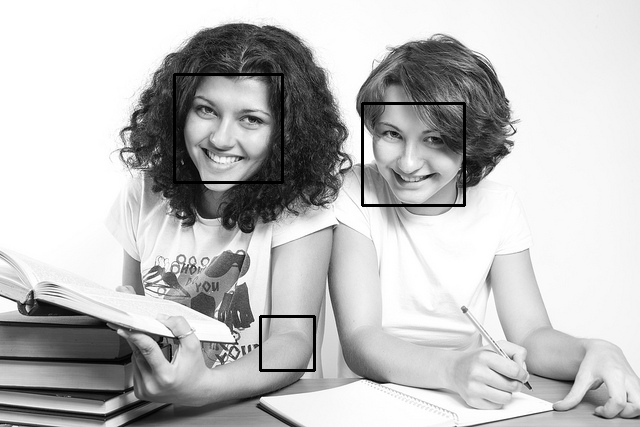

In [56]:
# Opencv cascade classifier avec la visualisation plot

# Chargement de la photo, zero pour rendre l'image grise
img = cv2.imread('/content/Detection_Face/test1.jpg', 0)

# Des commandes pour la vidéo, avec la boucle while
#cap = cv2.VideoCapture(0 and while True

	# Charger le model preentrainé que nous avons telecharger.
classifier = CascadeClassifier('/content/Detection_Face/haarcascade_frontalface_default.xml')
	# Detection du visage
	#Appel de la fonction : detectMultiScale() pour la détection de visage sur une photo (delimitation)

	# Utilisons la fonction detectMultiScale d'OpenCV
faces = classifier.detectMultiScale(img, 1.03, 7)


	# imprimer le cadre de délimitation pour chaque visage détecté avec la variable box
for box in faces:
		# extraction des coordonnés du rectangle des visages
		x, y, width, height = box
		x2, y2 = x + width, y + height
		# Dessiner le rectangle avex des pixels
		rectangle(img, (x, y), (x2, y2), (0,0,255), 2)
	 	# Permet de redimentionner l'image en 224px 
		redi = cv2.resize(img, (224, 224))
	# Montrer le visage, avec l'import cv2imshow
cv2_imshow(img)
# Mettre l'ecran sur pause jusqu'à l'appui d'un bouton
cv2.waitKey(0)
# Fermer toutes les fenetres
cv2.destroyAllWindows()



Nous observons que notre detecteur enregistre de tous petits problèmes. Correction du problème de detection avec la fonction : detectMultiScale() et les arguments scaleFactor et minNeighbors. Réajustons des paramètres.

Voici notre reglage avec scalefactor et minNeighbors, nous remarquons que tous les visages sont detectés mais une arrière plan aussi.

In [57]:
bboxes = classifier.detectMultiScale(img, 1.03, 7)

Utilisons d'autres techniques, Le MTCNN peut donner des resultats plus probants avec notre apprentissage DL.

Pour cela :

Une analyse en cascade de CNN en 3 etapes avec des réseaux plus profond pour detecter les visages.Voici le processus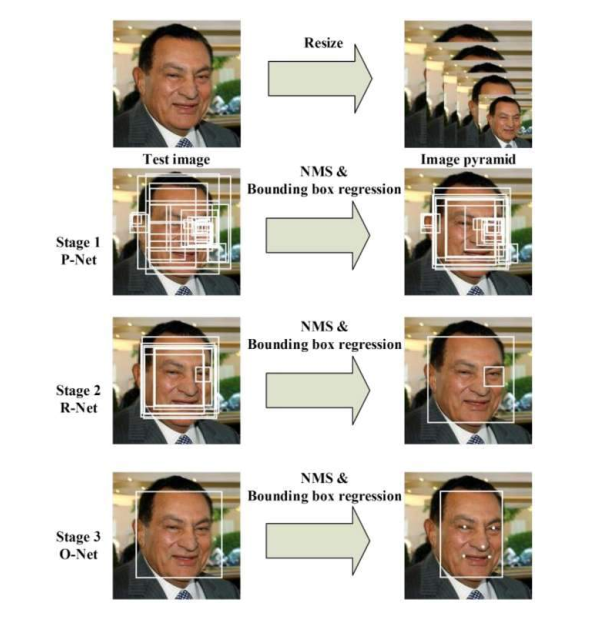  
Source image : https://ichi.pro/fr/mtcnn-reseau-de-convolution-en-cascade-multi-taches-186543706018893

Installation notre biblio préentrainté mtcnn avec pip

In [58]:
# Commande d'installation et verification de la version
# Source github : https://github.com/jbrownlee/mtcnn
!pip install mtcnn
!pip show mtcnn
import mtcnn
# afficher version
print(mtcnn.__version__)

Name: mtcnn
Version: 0.1.1
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: keras, opencv-python
Required-by: 
0.1.0


Utilisation du modèle Préentrainement MTCNN

In [59]:
# Chargeons l'image dans mtcnn avec file comme variable (avec la fonction matplotlib)
file = '/content/Detection_Face/test2.jpg'
img = pyplot.imread(file)
# Creation du detecteur de visage
detector = MTCNN()
# Detection du visage dans l'image avec la foncton detectface
faces = detector.detect_faces(img)
plt.show()
# Afficher les coordonnées dans la boucle for
for face in faces:
	print(face)

{'box': [320, 268, 31, 42], 'confidence': 0.9999721050262451, 'keypoints': {'left_eye': (330, 286), 'right_eye': (345, 285), 'nose': (339, 296), 'mouth_left': (331, 301), 'mouth_right': (345, 301)}}
{'box': [226, 39, 30, 41], 'confidence': 0.9999593496322632, 'keypoints': {'left_eye': (233, 56), 'right_eye': (248, 55), 'nose': (241, 63), 'mouth_left': (234, 70), 'mouth_right': (249, 69)}}
{'box': [373, 155, 32, 44], 'confidence': 0.9999196529388428, 'keypoints': {'left_eye': (380, 173), 'right_eye': (394, 171), 'nose': (387, 181), 'mouth_left': (382, 188), 'mouth_right': (396, 186)}}
{'box': [432, 45, 34, 45], 'confidence': 0.9998043179512024, 'keypoints': {'left_eye': (439, 64), 'right_eye': (454, 60), 'nose': (447, 70), 'mouth_left': (443, 78), 'mouth_right': (457, 74)}}
{'box': [133, 30, 30, 40], 'confidence': 0.9997820258140564, 'keypoints': {'left_eye': (141, 45), 'right_eye': (156, 45), 'nose': (148, 53), 'mouth_left': (140, 58), 'mouth_right': (155, 59)}}
{'box': [63, 149, 31, 3

Nous voyons l'extraction de differentes caracteristiques de differents visages(listes), des valeurs, de pixels de notre rectangle avec plus de précision que le premier modele. box (x, y, largeur et hauteur). MTCNN a localisé les yeux, la bouche, le nez...
Nous allons fixer le rectangles sur les visages maintenant...

Ici nous avons imprimé chaque visage detecté sous forme de liste. Definissons les rectangles avec nos coordonnées. On va y ajouter une fonction Draw pour dessiner une image avec des boîtes.

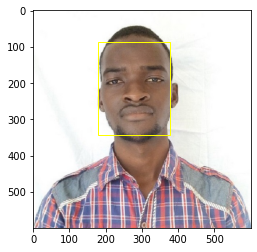

In [60]:
# Dessiner le rectangle avec la fonction draw avec 2 parametres
def draw(file, result_list):
	# charger l'image avec matplotlib
	img = pyplot.imread(file)
	# visualiser image avec plot
	pyplot.imshow(img)
	# Dessin des cases
	ax = pyplot.gca()
 
	# tracer les cases rectangles
	for result in result_list:
		# Definir les coordonnées
		x, y, width, height = result['box']
		# Tracer les cases avec les coordonnées
		rect = Rectangle((x, y), width, height, fill=False, color='Yellow')
		# Dessin de la case
		ax.add_patch(rect)
	# Afficher le resultat
	pyplot.show()

file = '/content/Detection_Face/Mous_DV.jpg'
# Charger le fichier
pixels = pyplot.imread(file)
# Definir du detecteur
detector = MTCNN()
# detecttion des faces sur les images
faces = detector.detect_faces(pixels)
# Afficher les visages sur l'image d'origine
draw(file, faces)

Pour dessiner un cercle, ajoutons la fonction Circle pour les yeux, la bouche...

In [61]:
#import pour la fonction Circle afin d'ajouter des points sur le visage
from matplotlib.patches import Circle

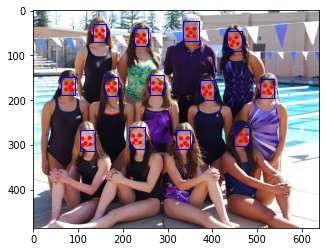

In [62]:
# On reprend la fonction en ajoutant quelques lignes de codes
def draw(file, result):
	data = pyplot.imread(file)
	pyplot.imshow(data)
	ax = pyplot.gca()
	for result in result:
		x, y, width, height = result['box']
		rect = Rectangle((x, y), width, height, fill=False, color='blue')
		ax.add_patch(rect)
	
		# Coce ajouter, faire le dessin des points
		for point, value in result['keypoints'].items():
			# creation des points cercle
			dot = Circle(value, radius=3, color='red')
			ax.add_patch(dot)
	# montrer les traces
	pyplot.show()

file = '/content/Detection_Face/test2.jpg'
img = pyplot.imread(file)
detector = MTCNN()
faces = detector.detect_faces(img)
# Affichage du resultat
draw(file, faces)

Nous voyons que les visages sont parfaitement detectés avec le modèle MTCNN. Ici nous faisons l'extraction que des visages dans la photo avec la même methode. Faisons un test d'extraction des visages, cela va nous aider pour la prochaine étape, l'identification.

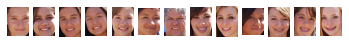

In [63]:
# l'extraction que des visages dans la photo avec la même methode

# Definir la fonction Extract et ses parametres
def Extract(file, result):
	# lire l'image
	data = pyplot.imread(file)
	# utiliser la Boucle for pour parcourir et faire le traçage des faces
	for i in range(len(result)):
		x1, y1, width, height = result[i]['box']
		x2, y2 = x1 + width, y1 + height
		# definir le traçage
		pyplot.subplot(1, len(result), i+1)
		pyplot.axis('off')
		# Afficher les traits
		pyplot.imshow(data[y1:y2, x1:x2])
	pyplot.show()

file = '/content/Detection_Face/test2.jpg'
img = pyplot.imread(file)
detector = MTCNN()
faces = detector.detect_faces(img)
Extract(file, faces)

Bref, nous avons une detection de visage à l'aide d'un modèle preentrainé avec OpenCV.

Nous avons utilisé le classificateur Haarcascade. Nous avons essayé de corriger les imperfections.

Ensuite, pour corriger et faire les reglages, nous avons utiliser le modèle hyper performant avec MTCNN en 3 étapes

Definitions des traits, analyses listes des caracteristiques de chaque visage, traçage des points, rectanges, cercles à l'aide des coordonnées x, y, width et height.

Resultat performant, manipulation à l'aide de plusieurs photos pour le test. Nous avons obtenu un resultat performant.

Prochaine étape : identification des visages dans les images.